In [7]:
# !pip install matplotlib

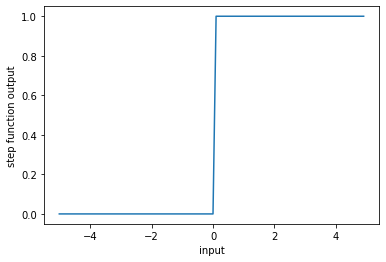

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation function
unit_step = lambda x: 0 if x < 0 else 1

# vectorize the function (use on an array)
unit_step_v = np.vectorize(unit_step)

# create arrays to plot
x = np.arange(-5, 5, 0.1)
y = unit_step_v(x)

# plot
plt.plot(x, y)
plt.xlabel('input'); plt.ylabel('step function output');
plt.show()

In [9]:
# data ('OR' gate)
# tuple format: ([x1, x2, bias], expected)
training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1)
]

In [10]:
from random import choice

# weights (begin with random weights)
w = np.random.rand(3)

# errors (store for plotting)
errors = []

# learning rate (the size of 'jumps' when updating the weights)
learn_rate = 0.2

# number of iterations/weight updates
n = 50

# 'learning' loop
for i in range(n):
    # slect a random item from the training data
    x, expected = choice(training_data)
    # neuron calculation (dot product of weights and input)
    result = np.dot(w, x)
    # compare to the expected result
    error = expected - unit_step(result)
    errors.append(error)
    # update the weights
    w += learn_rate * error * x

# tes the perceptron with the 'learned' weights
for x, _ in training_data:
    result = np.dot(x, w)
    print('{}: {} -> {}'.format(x[:2], result, unit_step(result)))

[0 0]: -0.11873985380568097 -> 0
[0 1]: 0.832027959427105 -> 1
[1 0]: 0.0852695346862003 -> 1
[1 1]: 1.0360373479189862 -> 1


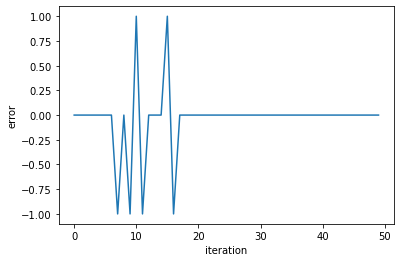

In [22]:
# plot error as a function of iteration
iteration = np.arange(0, n, 1)
plt.plot(iteration, errors)
plt.xlabel('iteration'); plt.ylabel('error');
plt.show()

In [14]:
# !pip install pandas

In [13]:
import pandas as pd

# create the OR operator
data = {
    'x1': [0,1,0,1],
    'x2': [0,0,1,1],
    'y': [0,1,1,1]
}

df = pd.DataFrame.from_dict(data).astype('int')
display(df.head())

# separate feature and target
X = df[['x1', 'x2']].values
y = df['y'].values

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,1


In [ ]:
# !pip install tensorflow

In [16]:
# import keras classes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# perceptron model
model = Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X,y,epochs=10);

Epoch 1/10
1/1 [==============================] - 0s 224ms/step - loss: 0.5846 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7500


In [17]:
# eval model
print('Model accuracy: ', model.evaluate(X, y)[1]*100)

1/1 [==============================] - 0s 90ms/step - loss: 0.5787 - accuracy: 0.7500
Model accuracy:  75.0


In [18]:
# set the url for the data location
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

In [21]:
# load the dataset
dataset = np.loadtxt(url, delimiter=',')

# split into input (X) and output (y) variables, (8 input col, 1 target col)
X = dataset[:,0:8]
y = dataset[:,8]

In [22]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
# compile keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
77/77 [==============================] - 0s 639us/step - loss: 6.6847 - accuracy: 0.5938
Epoch 2/100
77/77 [==============================] - 0s 623us/step - loss: 1.6492 - accuracy: 0.6133
Epoch 3/100
77/77 [==============================] - 0s 633us/step - loss: 1.2037 - accuracy: 0.6406
Epoch 4/100
77/77 [==============================] - 0s 651us/step - loss: 0.9945 - accuracy: 0.6328
Epoch 5/100
77/77 [==============================] - 0s 642us/step - loss: 0.8933 - accuracy: 0.6081
Epoch 6/100
77/77 [==============================] - 0s 645us/step - loss: 0.7738 - accuracy: 0.6393
Epoch 7/100
77/77 [==============================] - 0s 644us/step - loss: 0.7134 - accuracy: 0.6458
Epoch 8/100
77/77 [==============================] - 0s 637us/step - loss: 0.6932 - accuracy: 0.6341
Epoch 9/100
77/77 [==============================] - 0s 647us/step - loss: 0.6952 - accuracy: 0.6667
Epoch 10/100
77/77 [==============================] - 0s 694us/step - loss: 0.6777 - accura

77/77 [==============================] - 0s 632us/step - loss: 0.5514 - accuracy: 0.7292
Epoch 82/100
77/77 [==============================] - 0s 642us/step - loss: 0.5531 - accuracy: 0.7083
Epoch 83/100
77/77 [==============================] - 0s 631us/step - loss: 0.5317 - accuracy: 0.7370
Epoch 84/100
77/77 [==============================] - 0s 652us/step - loss: 0.5287 - accuracy: 0.7370
Epoch 85/100
77/77 [==============================] - 0s 639us/step - loss: 0.5413 - accuracy: 0.7253
Epoch 86/100
77/77 [==============================] - 0s 636us/step - loss: 0.5291 - accuracy: 0.7409
Epoch 87/100
77/77 [==============================] - 0s 636us/step - loss: 0.5393 - accuracy: 0.7487
Epoch 88/100
77/77 [==============================] - 0s 630us/step - loss: 0.5409 - accuracy: 0.7383
Epoch 89/100
77/77 [==============================] - 0s 701us/step - loss: 0.5179 - accuracy: 0.7422
Epoch 90/100
77/77 [==============================] - 0s 638us/step - loss: 0.5183 - accuracy: 

In [25]:
# eval model
print('Model accuracy:', model.evaluate(X, y)[1]*100)

24/24 [==============================] - 0s 685us/step - loss: 0.4833 - accuracy: 0.7578
Model accuracy: 75.78125
